In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Dataset 1 - Coauthorship, Newman 2016
This dataset is from [NetScience](http://users.cecs.anu.edu.au/~xlx/teaching/comp4650-sma/files/netsci_subgraph.gml)

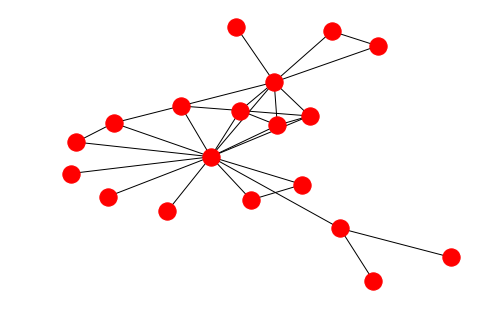

In [2]:
gs = nx.read_gml('data/netsci_subgraph.gml', label="label")
nx.draw_spring(gs)
plt.show()

Note: For some reasons, the labels are now shown (which they should be). I reported this issue to the Networkx github repo.

In [3]:
# Size of the graph:
gs.number_of_nodes()

19

In [4]:
gs.number_of_edges()

30

In [5]:
# Degree Centrality
nx.degree_centrality(gs)

{u'BALTHROP, J': 0.05555555555555555,
 u'BUHL, J': 0.05555555555555555,
 u'CALLAWAY, D': 0.2777777777777778,
 u'GHOSHAL, G': 0.1111111111111111,
 u'GIRVAN, M': 0.1111111111111111,
 u'HOPCROFT, J': 0.2222222222222222,
 u'JIN, E': 0.1111111111111111,
 u'KLEINBERG, J': 0.2222222222222222,
 u'LEICHT, E': 0.05555555555555555,
 u'MATTHEWS, P': 0.1111111111111111,
 u'MIROLLO, R': 0.1111111111111111,
 u'MONTOYA, J': 0.05555555555555555,
 u'MOORE, C': 0.16666666666666666,
 u'NEWMAN, M': 0.7222222222222222,
 u'SCHRAG, S': 0.05555555555555555,
 u'SOLE, R': 0.16666666666666666,
 u'STROGATZ, S': 0.4444444444444444,
 u'WATTS, D': 0.2222222222222222,
 u'YEUNG, M': 0.05555555555555555}

In [6]:
# Test if two people know each other
nx.shortest_path(gs, source = 'KLEINBERG, J', target = 'WATTS, D')

['KLEINBERG, J', u'CALLAWAY, D', 'WATTS, D']

# Dataset 2


Example using the NetworkX ego_graph() function to return the main egonet of
the largest hub in a Barabási-Albert network.

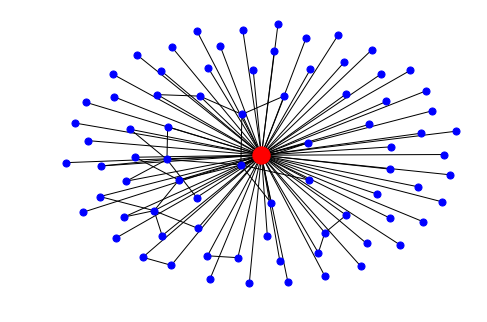

In [7]:
# Author:  Drew Conway (drew.conway@nyu.edu)

from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx


# Create a BA model graph
n = 1000
m = 2
G = nx.generators.barabasi_albert_graph(n, m)
# find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)
# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

In [8]:
hub_ego.number_of_edges()

102

In [9]:
hub_ego.number_of_nodes()

79

In [10]:
# Degree Centrality
h_degcent = nx.degree_centrality(hub_ego)
h_degcent

{1: 0.05128205128205128,
 2: 0.02564102564102564,
 3: 1.0,
 4: 0.08974358974358974,
 5: 0.02564102564102564,
 9: 0.01282051282051282,
 10: 0.08974358974358974,
 11: 0.02564102564102564,
 18: 0.01282051282051282,
 20: 0.05128205128205128,
 21: 0.02564102564102564,
 23: 0.01282051282051282,
 24: 0.02564102564102564,
 26: 0.07692307692307693,
 44: 0.038461538461538464,
 51: 0.02564102564102564,
 52: 0.038461538461538464,
 56: 0.02564102564102564,
 57: 0.02564102564102564,
 65: 0.01282051282051282,
 72: 0.01282051282051282,
 73: 0.01282051282051282,
 93: 0.02564102564102564,
 106: 0.02564102564102564,
 118: 0.01282051282051282,
 130: 0.01282051282051282,
 133: 0.01282051282051282,
 142: 0.01282051282051282,
 168: 0.02564102564102564,
 181: 0.02564102564102564,
 207: 0.01282051282051282,
 217: 0.01282051282051282,
 219: 0.01282051282051282,
 224: 0.01282051282051282,
 250: 0.02564102564102564,
 264: 0.01282051282051282,
 286: 0.02564102564102564,
 316: 0.01282051282051282,
 319: 0.012820512

In [11]:
def graph(centrality):
    lists = sorted(centrality.items())
    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.scatter(x, y, alpha = 0.5)
    plt.show()

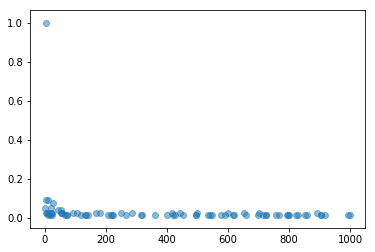

In [12]:
graph(h_degcent)

In [13]:
# Betweenness Centrality
h_betcent = nx.betweenness_centrality(hub_ego)
h_betcent

{1: 0.0004995004995004995,
 2: 0.0,
 3: 0.984015984015984,
 4: 0.0024975024975024975,
 5: 0.0,
 9: 0.0,
 10: 0.0024975024975024975,
 11: 0.0,
 18: 0.0,
 20: 0.0004995004995004995,
 21: 0.0,
 23: 0.0,
 24: 0.0,
 26: 0.001665001665001665,
 44: 0.0001665001665001665,
 51: 0.0,
 52: 0.0001665001665001665,
 56: 0.0,
 57: 0.0,
 65: 0.0,
 72: 0.0,
 73: 0.0,
 93: 0.0,
 106: 0.0,
 118: 0.0,
 130: 0.0,
 133: 0.0,
 142: 0.0,
 168: 0.0,
 181: 0.0,
 207: 0.0,
 217: 0.0,
 219: 0.0,
 224: 0.0,
 250: 0.0,
 264: 0.0,
 286: 0.0,
 316: 0.0,
 319: 0.0,
 361: 0.0,
 400: 0.0,
 416: 0.0,
 420: 0.0,
 426: 0.0,
 442: 0.0,
 453: 0.0,
 495: 0.0,
 496: 0.0,
 499: 0.0,
 534: 0.0,
 539: 0.0,
 546: 0.0,
 578: 0.0,
 589: 0.0,
 598: 0.0,
 615: 0.0,
 618: 0.0,
 653: 0.0,
 659: 0.0,
 698: 0.0,
 701: 0.0,
 715: 0.0,
 724: 0.0,
 725: 0.0,
 756: 0.0,
 767: 0.0,
 792: 0.0,
 797: 0.0,
 800: 0.0,
 822: 0.0,
 828: 0.0,
 853: 0.0,
 857: 0.0,
 890: 0.0,
 903: 0.0,
 905: 0.0,
 916: 0.0,
 991: 0.0,
 998: 0.0}

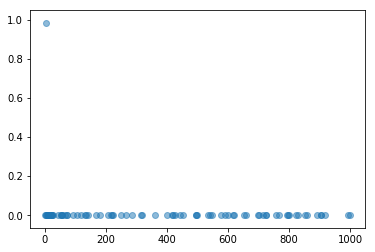

In [14]:
graph(h_betcent)

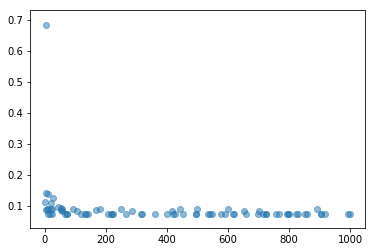

In [15]:
# eigenvector centrality
h_eigcent = nx.eigenvector_centrality(hub_ego)
graph(h_eigcent)